In [64]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [65]:
#read in data
df = pd.read_csv('/content/test.csv', encoding='latin-1')
df


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df['text'].values[50]

"Is watching acoustic performances! & In the mood for a good 'FRIENDS' episode! I miss that show"

In [67]:
df.shape

(4815, 9)

Understanding the dataset

<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

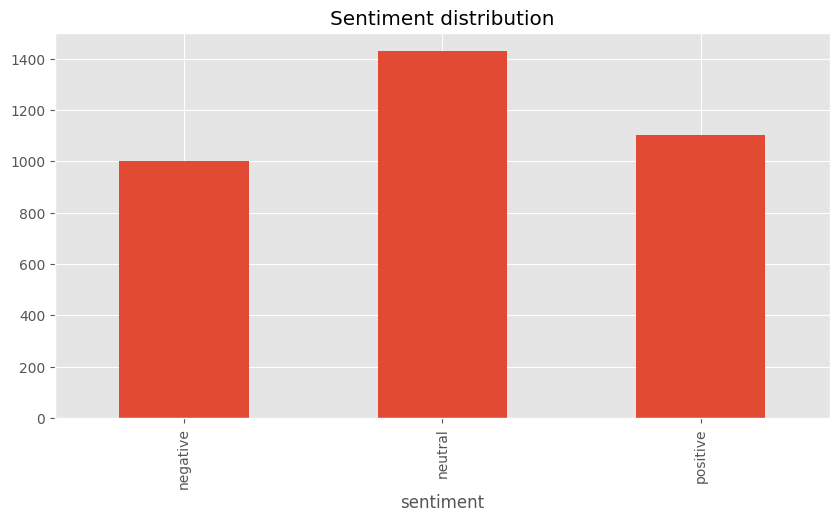

In [68]:
df['sentiment'].value_counts().sort_index().plot(kind='bar', title='Sentiment distribution',
        figsize=(10,5))

# Data Cleaning

In [69]:
df.isnull().values.sum()

11529

In [70]:
# drop all columns and 'text'	and 'sentiment' must stay
df = df[['text', 'sentiment']]
df

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
4810,NaN,NaN
4811,NaN,NaN
4812,NaN,NaN
4813,NaN,NaN


In [71]:
# drop all null values
df = df.dropna()
df

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


**Data CLeaning 2.0**

In [72]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
corpus=[]

for i in range(0, 3534):
  review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [74]:
corpus

['last session day http twitpic com ezh',
 'shanghai also realli excit precis skyscrap galor good tweep china sh bj',
 'recess hit veroniqu branquinho quit compani shame',
 'happi bday',
 'http twitpic com w p like',
 'great weee visitor',
 'think everyon hate lol',
 'soooooo wish could im school myspac complet block',
 'within short time last clue',
 'get day alright done anyth yet leav soon stepsist though',
 'bike put hold known argh total bummer',
 'check win',
 'twitter tavern bore much',
 'va weekend youngest son turn tomorrow make kinda sad get big check twipic',
 'come socket feel like phone hole not virgin loos',
 'hot today like hate new timet bad week',
 'miss',
 'cramp',
 'guy say hi answer question yesterday nice song',
 'go spiritu stagnent explod ego realis not great ok',
 'stupid storm river us tonight',
 'dead grandpa pay attent',
 'need retail therapi bad ahhh gimm money geebu',
 'go sleep',
 'lame go make breakfast',
 'that cool',
 'hey peopl dont hate ground haha im

# Data transformation

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3534)

In [76]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [77]:
# Saving Bow dictionary
import pickle
bow_path = '/content/bow.pkl'
pickle.dump(cv, open(bow_path, "wb"))

# Model Fitting (Native Baves)

In [78]:
min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [80]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [81]:
# exportimportant classifier for later use in predictions
import joblib
joblib.dump(classifier, 'classifier.pkl')

['classifier.pkl']

**Model Performance**

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Model performance
y_pred_rf = rf_classifier.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


Confusion Matrix:
[[119  75  16]
 [ 41 193  47]
 [  4  60 152]]
Accuracy: 0.6562942008486563
